**Name: Raven Jacinto** <br>
**Course and Section: CPE019 - CPE32S3** <br>
**Date of Submission: April 2, 2024** <br>
**Instructor: Engr. Roman Richard** <br>
**Activity: Hands-on Activity 6.2 Training Neural Networks** <br>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
574,1,143,86,30,330,30.1,0.892,23,0
385,1,119,54,13,50,22.3,0.205,24,0
712,10,129,62,36,0,41.2,0.441,38,1
347,3,116,0,0,0,23.5,0.187,23,0
578,10,133,68,0,0,27.0,0.245,36,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 23ms/step - loss: 0.6886 - accuracy: 0.5972 - val_loss: 0.6785 - val_accuracy: 0.5938
Epoch 2/200
18/18 [==============================] - 0s 11ms/step - loss: 0.6680 - accuracy: 0.6163 - val_loss: 0.6599 - val_accuracy: 0.6042
Epoch 3/200
18/18 [==============================] - 0s 18ms/step - loss: 0.6514 - accuracy: 0.6372 - val_loss: 0.6448 - val_accuracy: 0.6302
Epoch 4/200
18/18 [==============================] - 0s 14ms/step - loss: 0.6378 - accuracy: 0.6389 - val_loss: 0.6323 - val_accuracy: 0.6302
Epoch 5/200
18/18 [==============================] - 0s 15ms/step - loss: 0.6265 - accuracy: 0.6406 - val_loss: 0.6218 - val_accuracy: 0.6302
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6167 - accuracy: 0.6458 - val_loss: 0.6128 - val_accuracy: 0.6510
Epoch 7/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6083 - accuracy: 0.6528 - val_loss: 0.6050 - val_accuracy: 0.6667
Epoch 8/

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.53936136],
       [0.6226456 ],
       [0.34128937],
       [0.19979763],
       [0.1730347 ],
       [0.475262  ],
       [0.01948157],
       [0.3587971 ],
       [0.9323809 ],
       [0.23542723]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.824


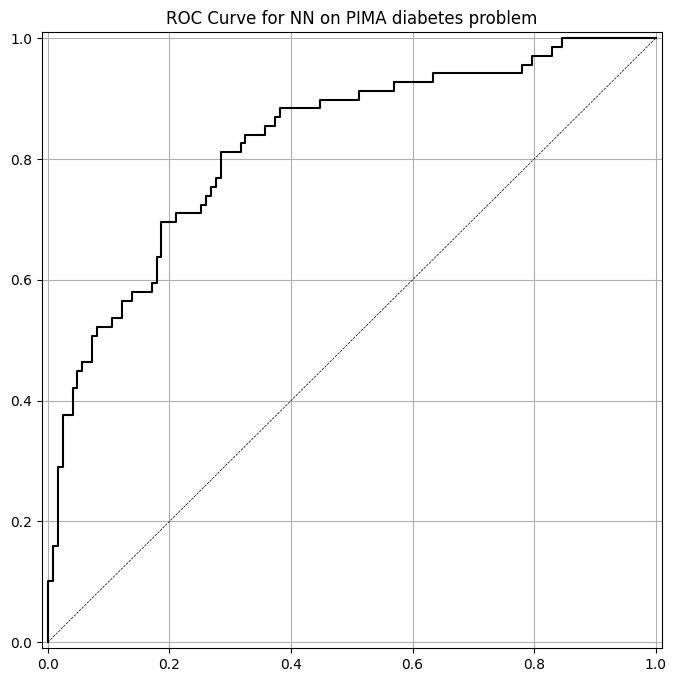

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

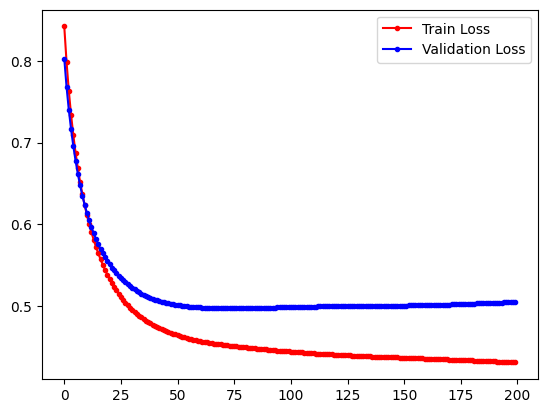

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

@ 200 epochs
accuracy is 0.641
roc-auc is 0.813





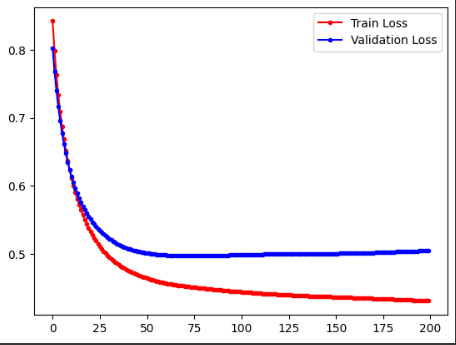

@ 600 epochs
accuracy is 0.641
roc-auc is 0.821


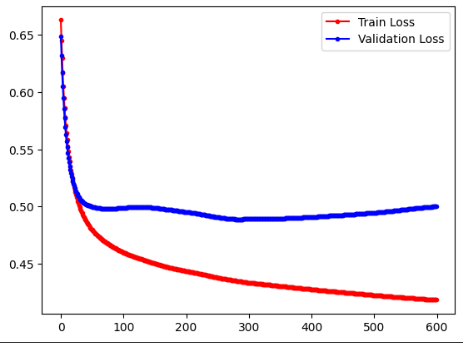

@1000 epochs
accuracy is 0.641
roc-auc is 0.821

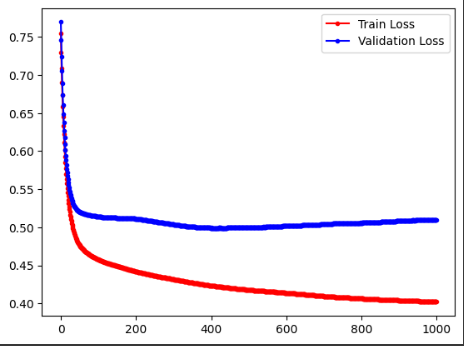

What is your interpretation about the result of the train and validation loss?

### **Evaluation:** The accuracy remains only at 0.641 even using different epochs, it indicates that the model's classification performance does not improve with more epochs. ROC-AUC slightly decreases from 0.821 at 600 and 1000 epochs to 0.813 at 200 epochs, indicating that the model's ability to discriminate between positive and negative classes decreases slightly at 200 epochs compared to 600 and 1000 epochs. The model seems running appropriately based on its defined parameters and structure, as there is no significant improvement in accuracy or ROC-AUC with additional epochs beyond 200. It's worth noting that the model might benefit from further hyperparameter tuning or architectural modifications to improve its performance.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf

# Dataset Setup and Slight Preprocessing
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

# Data Split
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

np.mean(y), np.mean(1-y)

# Data value adjustments for better processing
normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Model with two hidden layers, each with 6 nodes
# Using "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model compilation using .003 of learning rate and 1500 epochs for training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=1500, validation_data=(X_test, y_test), verbose=0)


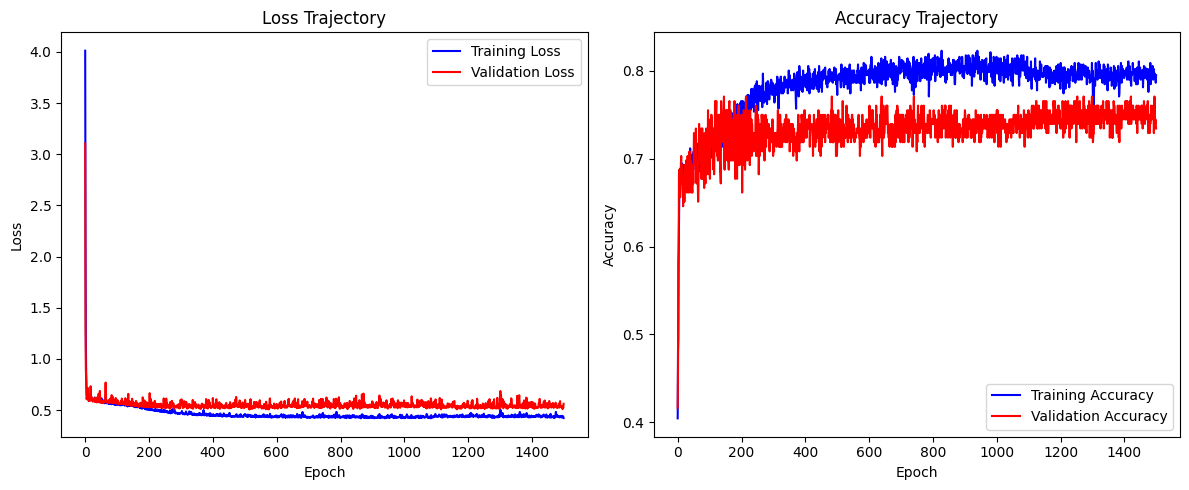

6/6 [==============================] - 0s 3ms/step


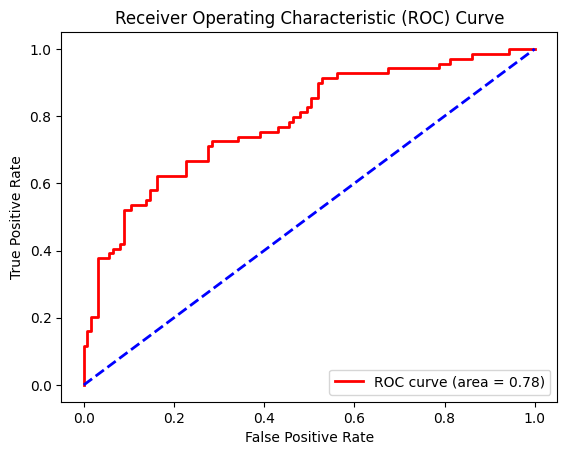

In [ ]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
# Plot the roc curve for the predictions

# Plot the trajectory of loss functions and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss', color ='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Trajectory')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color ='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Trajectory')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## 1.) Use different learning rates, numbers of epochs, and network structures.
## 2.) Plot the results of training and validation loss using different learning
## rates, number of epochs and network structures
## 3.) Interpret your result

In [ ]:
# Dataset Setup and Slight Preprocessing
filepath = "pima-indians-diabetes.csv"

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]

# Data Split
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

np.mean(y), np.mean(1-y)

# Data value adjustments for better processing
normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Model with two hidden layers, each with 6 nodes
# Using "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model compilation using .0003 of learning rate and 750 epochs for training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), verbose=0)

# Graph the trajectory of the loss functions, accuracy on both train and test set
# Plot the roc curve for the predictions

# Plot the trajectory of loss functions and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss', color ='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Trajectory')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

learning rate = 0.00003

epochs = 375

network structure = 15 nodes input to hidden layer 1, 7 nodes hidden layer1 to hidden layer2, 3 nodes to hidden layer2 to output. 1 final. RelU, RelU, RelU, Sigmoid

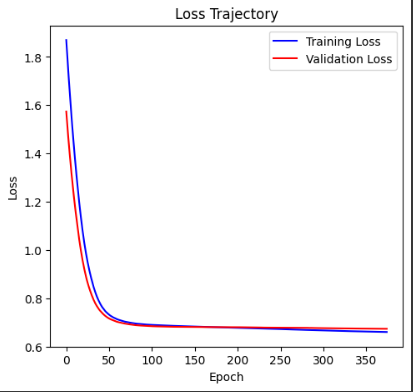

learning rate = 0.0003

epochs = 750

network structure = 12 nodes input to hidden1, 6 nodes hidden layer 1 to hidden layer2, 3 nodes to hidden layer 2 to output. 1 final. RelU, RelU, RelU, Sigmoid

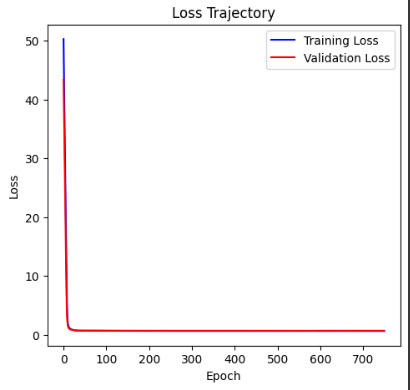

learning rate = 0.001

epochs = 1000

network structure = 32 nodes input to hidden layer 1, 16 nodes hidden layer 1 to hidden layer 2, 8 nodes hidden layer 2 to output. 1 final. RelU, RelU, RelU, Sigmoid

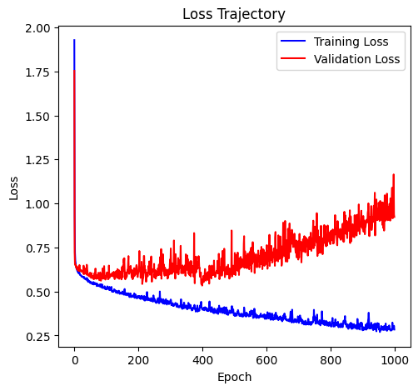

### **Supplementary Activity Evaluation:** Upon running different testing on the program using different epochs, learning rate, and structure. I found out that, the more I increase the learning rate the more the model became unreliable. Since from using 0.0003 and 0.00003 for 750 and 375 epochs which gave me an excellent result because the training loss and evaluation loss is almost close to each other. Meaning the model's performance has good generalization, has balanced complexity, and performs stable training. In short, not overfitting. With regards to the epochs, I do found out that the more I used lower epoch and balanced structure, the more it gives better results. Since when I tried to increase the learning rate, neurons, and epoch; The training and validation trajectory gave huge gap or difference when it comes to performance. In which training has lower loss than the validation which gives a high. That means there is an issue with the training or processing of data. While observing the ROC curve, I do believe that even though I did not plot it here, it gives at least 0.90 to 0.98 ROC curve area since the training and validation performance for the 375 and 750 is closer to each other during the entire performance. Unlike loss trajectory of 1000 epochs and with 0.001 LR. Considering that it also has increased number of neurons compared to first two examples.

#### Conclusion

### In conclusion, I do learn lots of things again regarding the training of data using neural networks. Especially on how to train and evaluate neural networks since it was the very purpose of this programming assignment. I discovered new plotting techniques, effects of using different epochs, structure, and learning rate for the model. I also improved my critical thinking skill because I need to analyze the results of the plot thoroughly and give attention to the differences it portrays. Overall, I enjoyed doing this assignment even though for me, it is very time consuming since I need to learn almost every "NEW" part of it before completing a task in this activity. Hoping to learn more about the different applications of neural networks.